# Predictive Modeling Workflow Plan for Credit Card Default Prediction

This plan outlines a comprehensive approach for predicting credit card defaults based on exploratory data analysis (EDA), feature selection, and machine learning modeling. The goal is to develop a predictive model that accurately identifies clients at risk of default in the next month, using historical data from credit card clients.

## Goals

Predict Credit Card Default

Use historical data to predict whether a client will default on their credit card payment in the next month.

Identify Key Predictors Determine which client attributes and behaviors are most predictive of default.

Optimize Model Performance

Achieve high accuracy in default prediction while maintaining interpretability of the model.

## Data Preparation and Cleaning

### Load Dataset
Import the dataset containing client demographics, credit data, payment history, and bill statements.
Clean Data: Handle missing values, outliers, and incorrect data entries. Standardize categorical variables and ensure numerical variables are appropriately scaled.
### Exploratory Data Analysis (EDA)
Variable Distribution: Analyze the distribution of continuous variables (e.g., LIMIT_BAL, AGE) and categorical variables (e.g., SEX, EDUCATION).
### Payment Behavior
Study the history of past payment records (PAY_0 to PAY_6) to understand payment behavior trends.
### Correlation Analysis
 Examine correlations among variables to identify potential multicollinearity and relationships with the target variable.
### Visualizations
 Use histograms, bar charts, and heatmaps to visualize key insights and trends.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "default_of_credit_card_clients.csv"

# Load the dataset
df = pd.read_csv(data_path, header=1)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
for col in ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, replace missing values with the mode
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Correcting data types
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')

# Handling outliers
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Capping/Flooring outliers
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] < lower_bound, lower_bound, df['LIMIT_BAL'])
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] > upper_bound, upper_bound, df['LIMIT_BAL'])
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: '4' if x not in ['1', '2', '3'] else x)

print(df.dtypes)
print(df.head())

ID                               int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month       int64
dtype: object
   ID  LIMI

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




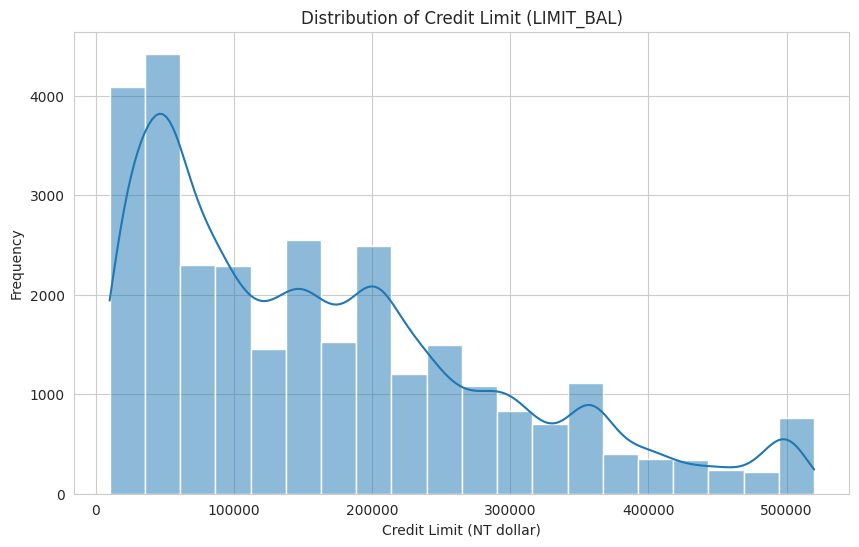

In [ ]:
sns.set_style("whitegrid")

## Distribution of LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], bins=20, kde=True)
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Frequency')
plt.show()

# Credit Limit Balance Analysis

The histogram for LIMIT_BAL reveals a right-skewed distribution, suggesting that a substantial number of credit card clients possess relatively low credit limits, with a steep drop-off as credit limits increase. This might reflect a cautious credit issuance policy by the credit card company, with higher limits being progressively rarer. Peaks at certain intervals might indicate standardized credit limit amounts assigned to different customer segments. Since credit limits are likely tied to individual creditworthiness and risk assessment conducted by the issuer, this feature could be a significant indicator in predicting default. A predictive model might interpret higher credit limits as a sign of higher creditworthiness and, potentially, a lower likelihood of default.

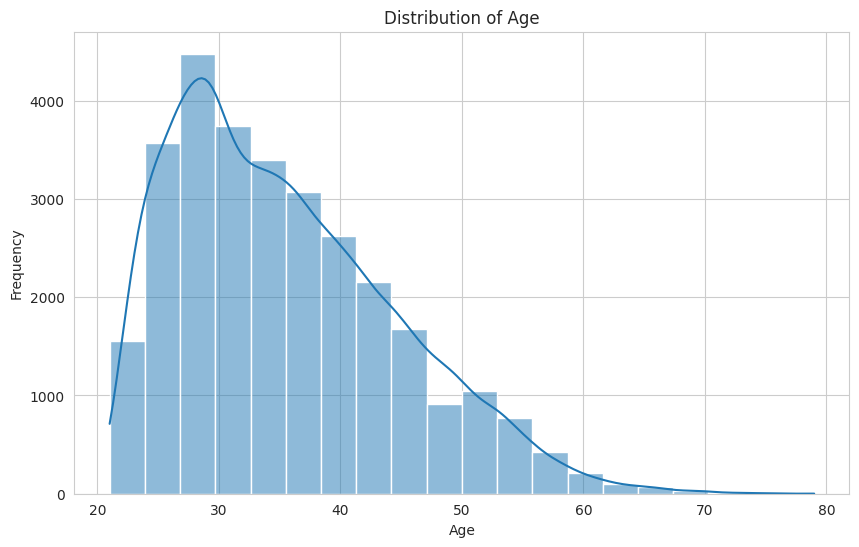

In [ ]:
## Distribution of AGE
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Age
The age distribution shows a modest right skew, with a notable concentration of clients in their late 20s to 30s. This might reflect the target demographic of the credit card market or the risk appetite of the issuing bank, which may prefer clients in their prime earning years. The tailing off of the distribution as age increases could indicate a smaller customer base among older age groups. This could be due to lower credit card adoption or different financial behaviors in these cohorts. Age could be a factor. However, its impact may not be linear and might interact with other variables such as employment status, education, or credit history.

<ipython-input-19-af5a278661fb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


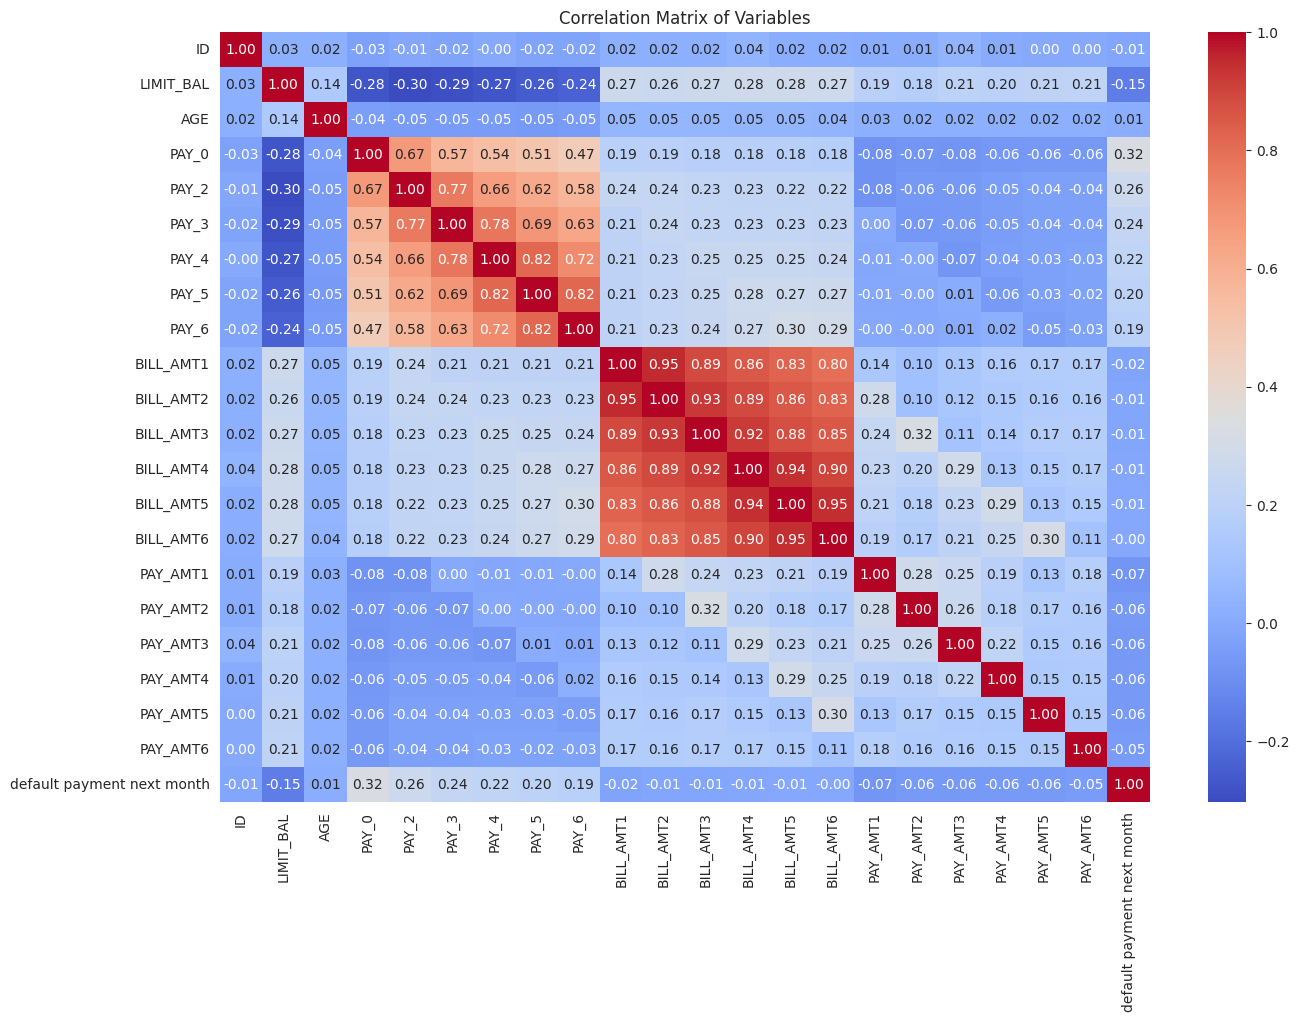

In [ ]:
## Correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Correlation Matrix of Variables
The correlation heatmap indicates strong correlations within the BILL_AMT features across different months and similarly for the PAY_AMT features, reflecting consistency in billing amounts and payment amounts. The payment status features (PAY_0 to PAY_6) shows moderate correlations with the target variable, default payment next month, showing their relevance in predicting default. However,  multicollinearity may require dimensionality reduction techniques such as PCA or regularization methods in the modeling to avoid model overfitting and to improve generalizability.

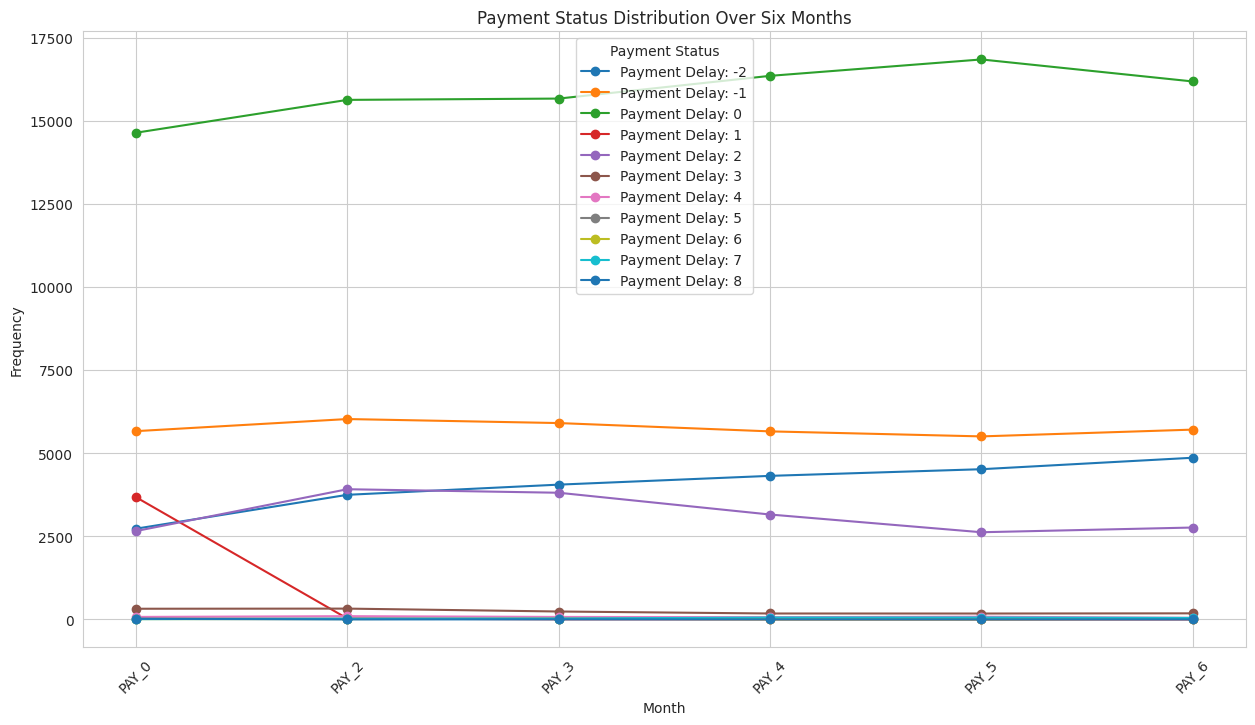

In [ ]:

plt.figure(figsize=(15, 8))
for status in pay_status_counts.index:
    plt.plot(pay_status_counts.columns, pay_status_counts.loc[status], marker='o', label=f'Payment Delay: {status}')

plt.title('Payment Status Distribution Over Six Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Payment Status')
plt.show()

# Payment Status Distribution Over Six Months
This line plot provides an overview of payment behavior across six months, where a significant proportion of clients pay on time or ahead of schedule (indicated by payment status codes -2 and 0). The presence of payment delays is less common and decreases with the severity of the delay. This pattern suggests that historical payment behavior is a critical predictor of future default, with more recent behaviors being potentially more indicative than older ones. A model incorporating these features would likely allocate significant weight to these variables, possibly using a weighted or time-decayed approach to reflect the decreasing relevance of older payment information.

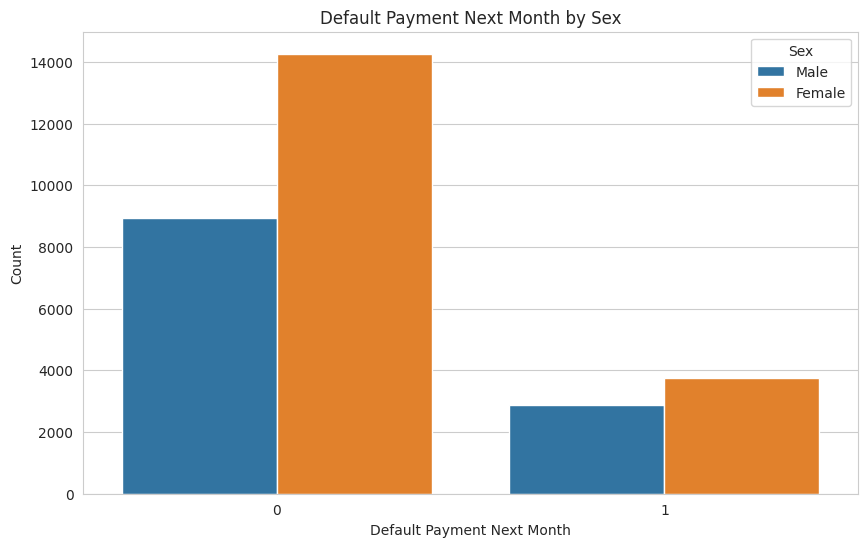

In [ ]:
## Distribution of default payment next month by SEX
plt.figure(figsize=(10, 6))
sns.countplot(x='default payment next month', hue='SEX', data=df)
plt.title('Default Payment Next Month by Sex')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

# Default Payment Next Month by Sex
The comparison of default rates by sex shows a minor disparity, with females exhibiting a slightly higher incidence of default. This suggests that while sex may play a role in default prediction, it is not a dominant factor. In practice, regulatory considerations may limit or prohibit the use of gender in credit scoring models. If included, it would be as part of a multifaceted analysis, considering interactions with other socio-economic factors and ensuring compliance with fair lending laws.

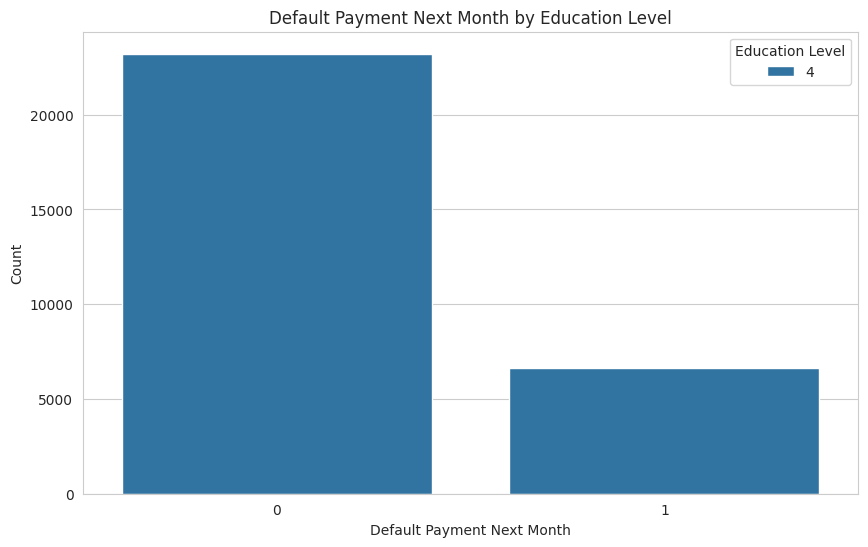

In [ ]:
## Distribution of default payment next month by EDUCATION
plt.figure(figsize=(10, 6))
sns.countplot(x='default payment next month', hue='EDUCATION', data=df)
plt.title('Default Payment Next Month by Education Level')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

# Education
The bar plot contrasting default rates by education level (with '4' possibly aggregating several less common education categories into 'other') suggests that those in the 'other' category are less likely to default. This could be due to a variety of reasons, such as different financial behaviors, risk profiles, or income levels associated with various levels of education. Encoding education level properly—such as through one-hot encoding or ordinal encoding if there's an inherent order—will be important to capture the potential predictive power of this variable. Moreover, the interaction of education with other demographic and behavioral factors could provide deeper insights when modeled.

# Modeling Approach

The exploratory data analysis points towards a nuanced approach for modeling credit card default risk. Starting with Logistic Regression is sensible; it's straightforward and offers clear insights into how different factors like payment history and age correlate with the likelihood of default. This model is particularly useful for its ease of explanation, an important aspect in the finance sector where transparency is paramount.

Yet, the EDA also reveals more intricate interactions between variables that Logistic Regression might not fully capture. This is where tree-based models come into play. Decision Trees and Random Forests could provide a more nuanced understanding without presuming linear relationships between variables. Random Forests are especially promising, as they mitigate overfitting by averaging multiple decision trees, making the model more robust.

To further enhance our predictive capability, Gradient Boosting Machines stand out as a sophisticated choice. GBMs have a knack for handling the kind of skewed distributions and complex variable interactions we've seen, like those in credit limits and payment behaviors. They iteratively improve upon themselves, which often results in better performance, and they shed light on which variables are most influential in predicting defaults.

In summary, I would begin with Logistic Regression for its clarity and move on to assess the performance of Random Forests and GBMs. The final model choice would strike a balance between the precision of predictions and our ability to interpret and explain those predictions, leaning towards GBMs for their robust performance and depth of insight, all while ensuring the model remains practical and actionable for real-world application.


The next step would be feature selection.

For feature selection, I'll start with a correlation analysis to remove highly correlated features, which can reduce model performance due to multicollinearity. Then, I'll use a model-based approach, such as feature importance from a random forest, to identify the most relevant features.

Then, for greadient boosting and logistic regression, I will standardize the features.

In [ ]:
# Calculate correlations
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_reduced = X.drop(to_drop, axis=1)


<ipython-input-25-97e918ed1bde>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_reduced, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X_reduced.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Selecting top 10 features
selected_features = feature_importances['feature'][:10].tolist()
X_selected = X_reduced[selected_features]


#defining features which can then be used to train the models

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train and predict with Logistic Regression
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
print("Logistic Regression classification report:")
print(classification_report(y_test, logreg_pred))

# Train and predict with Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest classification report:")
print(classification_report(y_test, rf_pred))

# Train and predict with Gradient Boosting Machine
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
print("Gradient Boosting Machine classification report:")
print(classification_report(y_test, gbm_pred))

# Evaluate models using cross-validation
logreg_cv_score = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_cv_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
gbm_cv_score = cross_val_score(gbm, X_train, y_train, cv=5, scoring='accuracy')

print(f"Logistic Regression CV accuracy: {np.mean(logreg_cv_score):.3f}")
print(f"Random Forest CV accuracy: {np.mean(rf_cv_score):.3f}")
print(f"Gradient Boosting Machine CV accuracy: {np.mean(gbm_cv_score):.3f}")

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4631
           1       0.71      0.24      0.35      1336

    accuracy                           0.81      5967
   macro avg       0.76      0.60      0.62      5967
weighted avg       0.79      0.81      0.77      5967

Random Forest classification report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4631
           1       0.62      0.36      0.46      1336

    accuracy                           0.81      5967
   macro avg       0.73      0.65      0.67      5967
weighted avg       0.79      0.81      0.79      5967

Gradient Boosting Machine classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4631
           1       0.68      0.36      0.47      1336

    accuracy                           0.82      5967